<a href="https://colab.research.google.com/github/leopoljuleskolie/MPA-MLF/blob/main/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM for classification

In [3]:

from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [5]:

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [6]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

In [8]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Select only the first two features (columns) of iris.data
X = iris.data[:, :2]

# Filter out the entries where iris.target is equal to 2
indices = iris.target != 2
X = X[indices]
y = iris.target[indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the SVM model
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)

# Print the model's parameters
print(SVMmodel.get_params())

# Evaluate the model's accuracy on the testing set
accuracy = SVMmodel.score(X_test, y_test)
print("Accuracy:", accuracy)


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy: 1.0


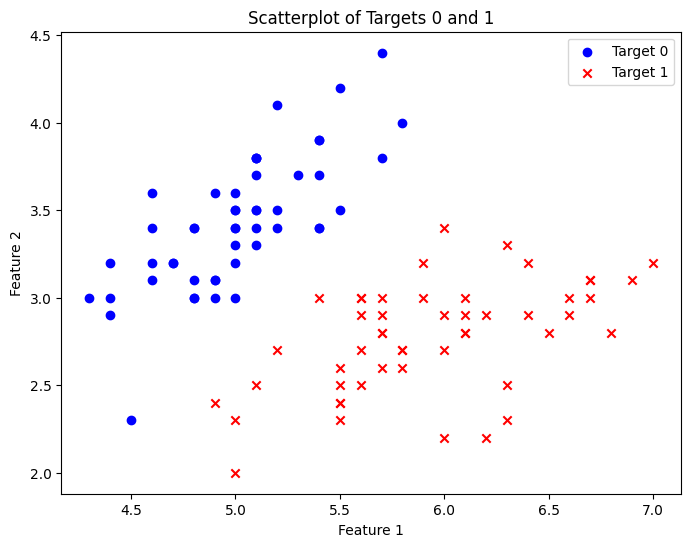

In [11]:
import matplotlib.pyplot as plt

# Plotting only target 0 and 1
plt.figure(figsize=(8, 6))

# Plot data points with target 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Target 0', color='blue', marker='o')

# Plot data points with target 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Target 1', color='red', marker='x')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Targets 0 and 1')

# Add legend
plt.legend()

# Show plot
plt.show()


In [12]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Select only the first two features (columns) of iris.data
X = iris.data[:, :2]

# Filter out the entries where iris.target is equal to 2
indices = iris.target != 2
X = X[indices]
y = iris.target[indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the SVM model with regularization parameter C
C = 200  # You can adjust this value
SVMmodel = SVC(kernel='linear', C=C)
SVMmodel.fit(X_train, y_train)

# Evaluate the model's accuracy on the testing set
accuracy = SVMmodel.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.95


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

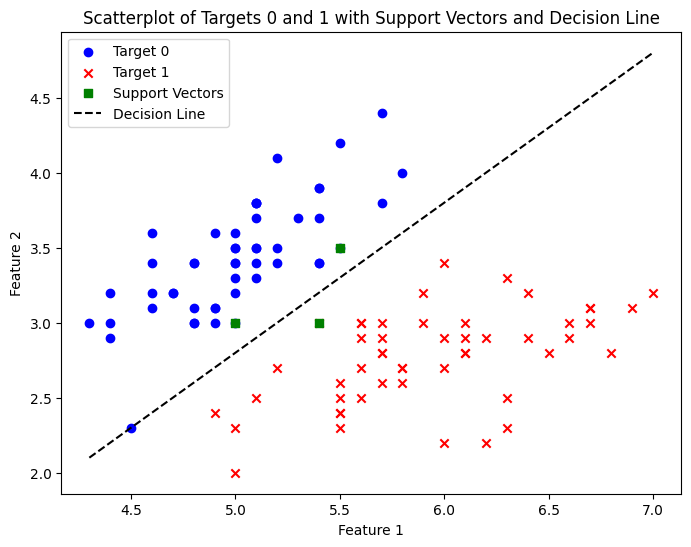

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting only target 0 and 1
plt.figure(figsize=(8, 6))

# Plot data points with target 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Target 0', color='blue', marker='o')

# Plot data points with target 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Target 1', color='red', marker='x')

# Extract support vectors
support_vectors = SVMmodel.support_vectors_

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', marker='s', label='Support Vectors')

# Separating line coefficients
W = SVMmodel.coef_
b = SVMmodel.intercept_

# Plot decision line
x0 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x1 = -(W[0, 0] * x0 + b) / W[0, 1]
plt.plot(x0, x1, color='black', linestyle='--', label='Decision Line')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Targets 0 and 1 with Support Vectors and Decision Line')

# Add legend
plt.legend()

# Show plot
plt.show()


Anomaly detection via SVM

mport one-class SVM and generate data (Gaussian blobs in 2D-plane):

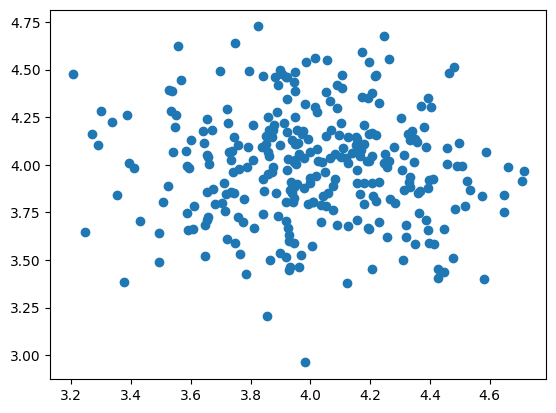

In [15]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(11)

# Generate data
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.3, center_box=(4, 4))

# Visualize data
plt.scatter(x[:, 0], x[:, 1])
plt.show()


Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

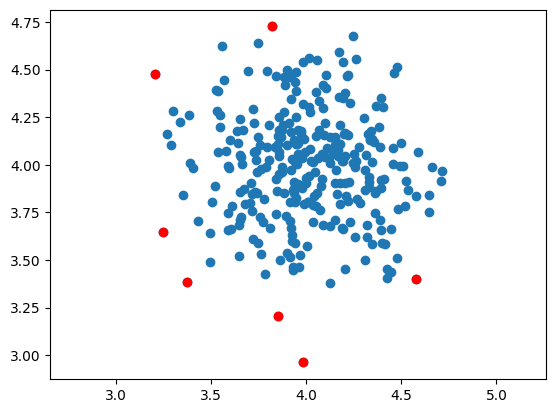

In [16]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import numpy as np

# Define parameters for the OneClassSVM
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

# Fit the OneClassSVM model to the data
SVMmodelOne.fit(x)

# Make predictions on the data
pred = SVMmodelOne.predict(x)

# Find the indices of anomalies (where prediction is -1)
anom_index = np.where(pred == -1)

# Extract the values of anomalies
values = x[anom_index]

# Plot the data points
plt.scatter(x[:, 0], x[:, 1])

# Plot the anomalies in red
plt.scatter(values[:, 0], values[:, 1], color='red')

# Set the aspect ratio to be equal
plt.axis('equal')

# Show the plot
plt.show()


Plot the support vectors:

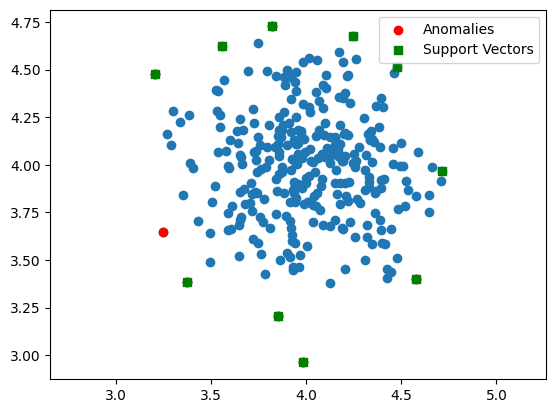

In [17]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import numpy as np

# Define parameters for the OneClassSVM
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

# Fit the OneClassSVM model to the data
SVMmodelOne.fit(x)

# Make predictions on the data
pred = SVMmodelOne.predict(x)

# Find the indices of anomalies (where prediction is -1)
anom_index = np.where(pred == -1)

# Extract the values of anomalies
values = x[anom_index]

# Extract the support vectors
support_vectors = SVMmodelOne.support_vectors_

# Plot the data points
plt.scatter(x[:, 0], x[:, 1])

# Plot the anomalies in red
plt.scatter(values[:, 0], values[:, 1], color='red', label='Anomalies')

# Plot the support vectors in green
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', marker='s', label='Support Vectors')

# Set the aspect ratio to be equal
plt.axis('equal')

# Add legend
plt.legend()

# Show the plot
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


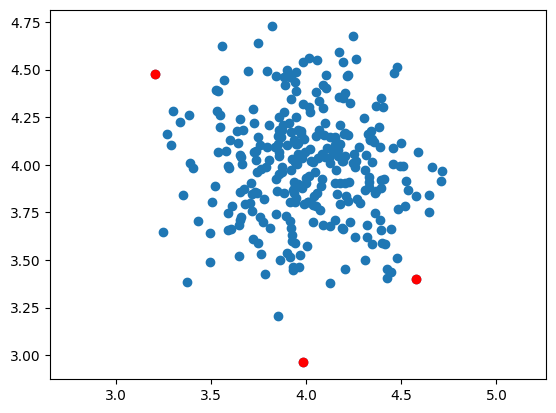

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate anomaly scores for each sample
scores = SVMmodelOne.score_samples(x)

# Calculate threshold using the 1st percentile of scores
thresh = np.quantile(scores, 0.01)
print(thresh)

# Find the indices of samples with scores less than or equal to the threshold
index = np.where(scores <= thresh)

# Extract the values of anomalies
values = x[index]

# Plot the data points
plt.scatter(x[:, 0], x[:, 1])

# Plot the anomalies in red
plt.scatter(values[:, 0], values[:, 1], color='red')

# Set the aspect ratio to be equal
plt.axis('equal')

# Show the plot
plt.show()
